<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Distance_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# !pip install importlib
# !pip install imp
# !pip install nltk
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

     |████████████████████████████████| 24.2MB 97kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


In [2]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2019-11-16 14:05:13--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  4.56MB/s    in 3.4s    

2019-11-16 14:05:17 (4.56 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")
direc = "/content/gdrive/My Drive/Colab Notebooks/CAPSTONE/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!pip install import_ipynb
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import importlib
import nltk
import matplotlib.pyplot as plt
import gensim

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
property_ = "speaking"
file1 = open(direc+"gables_{}_list.txt".format(property_), "r")
file2 = open(direc+"avonlea_{}_list.txt".format(property_), "r")
file3 = open(direc+"island_{}_list.txt".format(property_), "r")
file4 = open(direc+"poplars_{}_list.txt".format(property_), "r")
file5 = open(direc+"dreams_{}_list.txt".format(property_), "r")
file6 = open(direc+"ingleside_{}_list.txt".format(property_), "r")
file7 = open(direc+"rainbow_{}_list.txt".format(property_), "r")
file8 = open(direc+"rilla_{}_list.txt".format(property_), "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets_pre = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets_pre[s].append(files[s][i])
  # file.close()

In [0]:
#labeling book & character to label cluster proportions ####coreference
from gensim.utils import simple_preprocess
book_character_labels = []

for i in range(len(targets_pre)):
  for e in targets_pre[i]:
    in_labs = False
    for n in e.split(",")[1::2]:
      if (n, i) in book_character_labels:
        in_labs = n
    if in_labs==False:
      character_name_lengths = np.array([len(n) for n in e.split(",")[1::2]])
      book_character_labels.append((i, e.split(",")[np.argmax(character_name_lengths)*2+1]))
    else:
      book_character_labels.append((i, in_labs))

# book_character_labels = [(character_labels[e], book_labels[e]) for e in range(len(character_labels))]

sentences_flattened = []
for i in sentences:
  for e in i:
    sentences_flattened.append(simple_preprocess(e[0]))

# Representing characters (Doc2Vec)

In [0]:
from nltk.tokenize import sent_tokenize
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess

character_documents = {}

for i in range(len(sentences_flattened)):
  a = character_documents.get(book_character_labels[i], [])
  a.append("\n")
  a.extend(sentences_flattened[i])
  character_documents[book_character_labels[i]] = a
  
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents.values()))]
model_d2v = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
characters_as_vectors = np.array([model_d2v.infer_vector(i) for i in list(character_documents.values())])

anne_characters = []
anne_vectors = []
for i in range(len(character_documents.keys())):
  if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
#     print('ok')
      if book_character_labels.count(list(character_documents.keys())[i])>5:
        anne_vectors.append(characters_as_vectors[i])
        anne_characters.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

# Representing Characters (TFIDF)

In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy

# #better preprocessing???

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # Run in terminal: python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# data_lemmatized = lemmatization(list(character_documents.values()))

# v = TfidfVectorizer()
# X = v.fit_transform(data_lemmatized)

# anne_characters_tfidf = []
# anne_vectors_tfidf = []
# for i in range(len(character_documents.keys())):
#   if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
# #     print('ok')
#       if book_character_labels.count(list(character_documents.keys())[i])>5:
#         anne_vectors_tfidf.append(X[i])
#         anne_characters_tfidf.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

# Representing Characters (Latent Dirichlet Allocation)

In [0]:
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.model_selection import GridSearchCV
# #https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

# #function from documentation
# def print_top_words(model, feature_names, n_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         message = "Topic #%d: " % topic_idx
#         message += " ".join([feature_names[i]
#                              for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
#     print()


# # lda = LatentDirichletAllocation(n_components=n
# #                                 , random_state=0)
# # 

# # Define Search Param
# search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(X)
# lda = model.best_estimator_
# lda.fit(X) 
# tfidf_feature_names = v.get_feature_names()
# transformed_X = lda.transform(X)
# print_top_words(lda, tfidf_feature_names , 10)

# anne_characters_lda = []
# anne_vectors_lda = []
# for i in range(len(character_documents.keys())):
#   if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
# #     print('ok')
#       if book_character_labels.count(list(character_documents.keys())[i])>5:
#         anne_vectors_lda.append(transformed_X[i])
#         anne_characters_lda.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

In [0]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [0]:
processed_docs = [i[0] for i in documents]
processed_docs  = [i.split() for i in lemmatization(processed_docs)]

In [0]:
# lemmatized

In [0]:
#change the corpus to bag of words
dictionary = gensim.corpora.Dictionary(processed_docs )
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
#convert bow to tfidf


In [0]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [0]:
coherences = []
for n in [5, 10, 20, 30, 40, 50]:
  lda_model_tfidf= LdaMallet(mallet_path, corpus=bow_corpus, num_topics=20, id2word=dictionary)
  cm = CoherenceModel(model=lda_model_tfidf, corpus=common_corpus, coherence='u_mass')
  coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
  coherences.append(coherence)

In [0]:
#lda_model_tfidf= LdaMallet(mallet_path, corpus=bow_corpus, num_topics=5, id2word=dictionary)
lda_model_tfidf= LdaMallet(mallet_path, corpus=bow_corpus, num_topics=np.argmax(coherences), id2word=dictionary)

In [46]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=common_corpus, coherence='u_mass')
# N = lda_model_tfidf.
coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
coherence_by_topic = cm.get_coherence_per_topic()
# np.exp((coherence_by_topic/2)*N*(N-1))
coherence_by_topic

[0.0, 0.0, -2.3376739117136243, 0.0, -4.403975506281177]

In [0]:
# cm = CoherenceModel(model=lda_model_tfidf, corpus=common_corpus, coherence='u_mass')
# # N = lda_model_tfidf.
# coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
# coherence_by_topic = cm.get_coherence_per_topic()
# # np.exp((coherence_by_topic/2)*N*(N-1))
# coherence_by_topic

In [47]:
lda_model_tfidf.print_topic(3)

'0.041*"live" + 0.039*"marry" + 0.032*"leave" + 0.027*"hear" + 0.026*"back" + 0.024*"ve" + 0.024*"die" + 0.022*"find" + 0.020*"dead" + 0.017*"happy"'

In [48]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.081*"dear" + 0.035*"make" + 0.021*"mrs" + 0.015*"call" + 0.015*"poor" + 0.013*"miss" + 0.013*"remember" + 0.013*"begin" + 0.013*"lose" + 0.012*"terrible"
Topic: 1 Word: 0.053*"good" + 0.052*"give" + 0.036*"put" + 0.025*"awful" + 0.021*"sit" + 0.020*"big" + 0.019*"mind" + 0.019*"ai" + 0.017*"eat" + 0.016*"nice"
Topic: 2 Word: 0.058*"make" + 0.046*"good" + 0.043*"anne" + 0.021*"talk" + 0.021*"suppose" + 0.018*"back" + 0.018*"home" + 0.018*"stay" + 0.017*"feel" + 0.017*"call"
Topic: 3 Word: 0.041*"live" + 0.039*"marry" + 0.032*"leave" + 0.027*"hear" + 0.026*"back" + 0.024*"ve" + 0.024*"die" + 0.022*"find" + 0.020*"dead" + 0.017*"happy"
Topic: 4 Word: 0.055*"wo" + 0.053*"ca" + 0.036*"feel" + 0.033*"long" + 0.025*"anne" + 0.024*"love" + 0.024*"glad" + 0.017*"nice" + 0.016*"beautiful" + 0.016*"afraid"


In [0]:
# import networkx as nx
# from sklearn.preprocessing import MinMaxScaler
# # scaler = MinMaxScaler()
# # nw_cs = scaler.fit_transform(X = cosine_similarities)

# nw_cs = cosine_similarities
# name_mapping = {i: anne_characters[i] for i in range(len(anne_characters))} 
# g = nx.from_numpy_matrix(nw_cs)
# pos = nx.spring_layout(g, k =1)
# weights = [g[u][v]['weight'] for u,v in g.edges]

# fig = plt.figure(1,figsize=(10,6)) 
# nx.draw(g, pos = pos, width = weights)
# nx.draw_networkx_labels(g, labels = name_mapping, pos = pos)
# plt.show()

# Cosine similarity (Doc2Vec)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cosine
cosine_similarities = np.zeros((len(anne_vectors), len(anne_vectors)))
for i in range(len(anne_vectors)):
  for e in range(len(anne_vectors)):
    cosine_similarities[i][e] = float(cosine(anne_vectors[i].reshape(1, -1), anne_vectors[e].reshape(1, -1)))

d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.969735,0.966403,0.922607,0.942351,0.930236,0.704936,0.821902,0.792755
"((1, Anne Shirley), count:488)",0.969735,1.000000,0.974859,0.969035,0.979393,0.967733,0.758484,0.873257,0.846079
"((2, Anne Shirley), count:454)",0.966403,0.974859,1.000000,0.972649,0.971883,0.969891,0.817913,0.900202,0.885589
"((3, Anne Shirley), count:243)",0.922607,0.969035,0.972649,1.000000,0.977038,0.978635,0.849933,0.936001,0.912554
"((4, Anne Shirley), count:365)",0.942351,0.979393,0.971883,0.977038,1.000000,0.979389,0.816602,0.908677,0.888933
"((5, Anne Cordelia), count:211)",0.930236,0.967733,0.969891,0.978635,0.979389,1.000000,0.872363,0.925543,0.934362
"((6, Anne dearie), count:42)",0.704936,0.758484,0.817913,0.849933,0.816602,0.872363,1.000000,0.936996,0.975164
"((7, Anne dearie), count:10)",0.821902,0.873257,0.900202,0.936001,0.908677,0.925543,0.936996,1.000000,0.957930
"((7, Mrs. Blythe), count:42)",0.792755,0.846079,0.885589,0.912554,0.888933,0.934362,0.975164,0.957930,1.000000


Text(0.5, 1.0, 'Doc2Vec Cosine Similarity Anne AGG & Anne other')

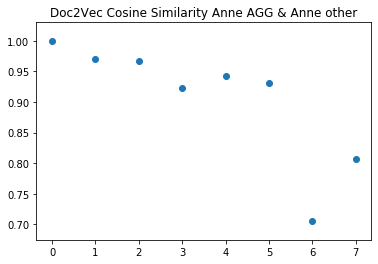

In [0]:
plt.scatter(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
plt.title("Doc2Vec Cosine Similarity Anne AGG & Anne other")

# Cosine similarity (TFIDF)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cosine
cosine_similarities = np.zeros((len(anne_vectors_tfidf), len(anne_vectors_tfidf)))
for i in range(len(anne_vectors_tfidf)):
  for e in range(len(anne_vectors_tfidf)):
    cosine_similarities[i][e] = float(cosine(anne_vectors_tfidf[i].reshape(1, -1), anne_vectors_tfidf[e].reshape(1, -1)))

d = pd.DataFrame(cosine_similarities, columns = anne_characters_tfidf, index = anne_characters_tfidf)
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.904855,0.900779,0.862483,0.855731,0.796379,0.628700,0.456912,0.589725
"((1, Anne Shirley), count:488)",0.904855,1.000000,0.913283,0.873952,0.883344,0.820044,0.653752,0.468764,0.606221
"((2, Anne Shirley), count:454)",0.900779,0.913283,1.000000,0.883900,0.889871,0.821409,0.633820,0.482601,0.611863
"((3, Anne Shirley), count:243)",0.862483,0.873952,0.883900,1.000000,0.865065,0.824628,0.606175,0.458196,0.583680
"((4, Anne Shirley), count:365)",0.855731,0.883344,0.889871,0.865065,1.000000,0.837959,0.635761,0.474885,0.610865
"((5, Anne Cordelia), count:211)",0.796379,0.820044,0.821409,0.824628,0.837959,1.000000,0.631595,0.457807,0.595552
"((6, Anne dearie), count:42)",0.628700,0.653752,0.633820,0.606175,0.635761,0.631595,1.000000,0.393674,0.503564
"((7, Anne dearie), count:10)",0.456912,0.468764,0.482601,0.458196,0.474885,0.457807,0.393674,1.000000,0.449245
"((7, Mrs. Blythe), count:42)",0.589725,0.606221,0.611863,0.583680,0.610865,0.595552,0.503564,0.449245,1.000000


Text(0.5, 1.0, 'TFIDF Cosine Similarity Anne AGG & Anne other')

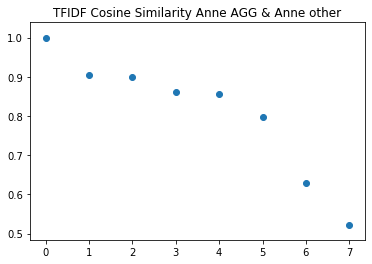

In [0]:
plt.scatter(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
plt.title("TFIDF Cosine Similarity Anne AGG & Anne other")

# Cosine similarity Latent Dirichlet Allocation

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cosine
cosine_similarities = np.zeros((len(anne_vectors_lda), len(anne_vectors_lda)))
for i in range(len(anne_vectors_lda)):
  for e in range(len(anne_vectors_lda)):
    cosine_similarities[i][e] = float(cosine(anne_vectors_lda[i].reshape(1, -1), anne_vectors_lda[e].reshape(1, -1)))

d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.995302,0.993567,0.972144,0.982993,0.970789,0.961759,0.939774,0.968758
"((1, Anne Shirley), count:488)",0.995302,1.000000,0.999010,0.976168,0.985728,0.977705,0.968766,0.949580,0.968466
"((2, Anne Shirley), count:454)",0.993567,0.999010,1.000000,0.972219,0.982287,0.970917,0.968609,0.952415,0.967202
"((3, Anne Shirley), count:243)",0.972144,0.976168,0.972219,1.000000,0.998531,0.947911,0.951828,0.918649,0.943667
"((4, Anne Shirley), count:365)",0.982993,0.985728,0.982287,0.998531,1.000000,0.958317,0.959276,0.927374,0.951701
"((5, Anne Cordelia), count:211)",0.970789,0.977705,0.970917,0.947911,0.958317,1.000000,0.942917,0.911732,0.946211
"((6, Anne dearie), count:42)",0.961759,0.968766,0.968609,0.951828,0.959276,0.942917,1.000000,0.923358,0.937349
"((7, Anne dearie), count:10)",0.939774,0.949580,0.952415,0.918649,0.927374,0.911732,0.923358,1.000000,0.922131
"((7, Mrs. Blythe), count:42)",0.968758,0.968466,0.967202,0.943667,0.951701,0.946211,0.937349,0.922131,1.000000


Text(0.5, 1.0, 'LDA Cosine Similarity Anne AGG & Anne other')

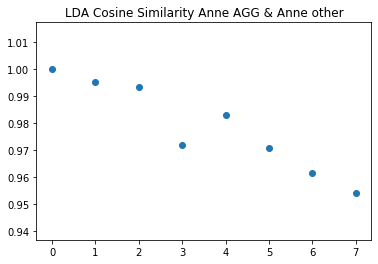

In [0]:
plt.scatter(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
plt.title("LDA Cosine Similarity Anne AGG & Anne other")

In [0]:
# from nltk.tokenize import sent_tokenize
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# sents = []
# for i in sentences:
#   sents.extend([e[0].split() for e in i])

# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sents)]
# model_d2v = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
# docs_as_vectors = np.array([model_d2v.infer_vector(i) for i in sents])
# #should add other characters

# K-Means Clustering by DOCUMENT

In [0]:
# n_clust = 8
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(docs_as_vectors)

In [0]:
# #test prediction
# kmeans.predict(docs_as_vectors[3000].reshape(1, -1))

In [0]:
# cluster_labels = []
# for i in docs_as_vectors:
#   cluster_labels.append(kmeans.predict(i.reshape(1, -1)))

In [0]:
# for i in range(n_clust):
#   print(cluster_labels.count(i))

In [0]:
# book_character_in_cluster = []
# for i in range(n_clust):
#     this_cluster = []
#     for e in range(len(cluster_labels)):
#       if cluster_labels[e]==i:
#         this_cluster.append((book_labels[e], character_labels[e]))
#     book_character_in_cluster.append(this_cluster)

In [0]:
# import operator

# cluster_data_frames = []
# for i in book_character_in_cluster:
#   counts = dict()
#   for e in i:
#     counts[e] = counts.get(e, 0) + 1
#   the_count = list(counts.values())
#   the_character = list(counts.keys())
#   cluster_data_frames.append(pd.DataFrame( {"book-character":the_character, "count":the_count}))

In [0]:
# cluster_data_frames[0].sort_values("count")[::-1][:10]

In [0]:
# cluster_data_frames[1].sort_values("count")[::-1][:50]

In [0]:
# cluster_data_frames[2].sort_values("count")[::-1][:50]

In [0]:
# cluster_data_frames[3].sort_values("count")[::-1][:50]

In [0]:
# cluster_data_frames[4].sort_values("count")[::-1][:10]

In [0]:
# cluster_data_frames[5].sort_values("count")[::-1][:10]

In [0]:
# cluster_data_frames[6].sort_values("count")[::-1][:10]

In [0]:
# cluster_data_frames[7].sort_values("count")[::-1][:10]

# Clustering of character vectors (both hierarchical and partitional)[link text](https://)

# Partitional Clustering for TFIDF


In [0]:
# for n_clust in [2, 4, 8, 16]:
#   from sklearn.cluster import KMeans
#   kmeans = KMeans(n_clusters=n_clust, random_state=0)
#   kmeans.fit(X)
#   tfidf_character_cluster = kmeans.predict(X)
#   tfidf_cluster_labels = dict(zip(list(character_documents.keys()), tfidf_character_cluster))

#   for i in range(n_clust):
#     print("CLUSTER{}, n_clust{}".format(i, n_clust))
#     for e in range(len(tfidf_character_cluster)):
#       if tfidf_character_cluster[e]==i:
#         print(list(character_documents.keys())[e])

# Partitional Clustering for LDA output



In [0]:
# for n_clust in [2, 4, 8, 16]:
#   from sklearn.cluster import KMeans
#   kmeans = KMeans(n_clusters=n_clust, random_state=0)
#   kmeans.fit(transformed_X)
#   lda_character_cluster = kmeans.predict(transformed_X)
#   lda_cluster_labels = dict(zip(list(character_documents.keys()), lda_character_cluster))

#   for i in range(n_clust):
#     print("CLUSTER{}, n_clust{}".format(i, n_clust))
#     for e in range(len(lda_character_cluster)):
#       if lda_character_cluster[e]==i:
#         print(list(character_documents.keys())[e])

# Partitional clustering for doc2vec


In [0]:
# for n_clust in [2, 4, 8, 16]:
#   from sklearn.cluster import KMeans
#   kmeans = KMeans(n_clusters=n_clust, random_state=0)
#   kmeans.fit(characters_as_vectors)
#   d2v_character_cluster = kmeans.predict(characters_as_vectors)
#   d2v_cluster_labels = dict(zip(list(character_documents.keys()), d2v_character_cluster))

#   for i in range(n_clust):
#     print("CLUSTER{}, n_clust{}".format(i, n_clust))
#     for e in range(len(d2v_character_cluster)):
#       if d2v_character_cluster[e]==i:
#         print(list(character_documents.keys())[e])

In [0]:
# from nltk.tokenize import sent_tokenize
# from gensim.parsing.preprocessing import preprocess_documents
# # from gensim.models import KeyedVectors
# from gensim.models import Word2Vec

# #returns vector representation of documents 
# def word2vec_tr(documents):
#     model_new = Word2Vec(size=300, min_count=1)
#     model_new.build_vocab(documents)
#     total_examples = model_new.corpus_count
#     model_new.build_vocab([list(model_new.wv.vocab.keys())], update=True) #fishy here, changed model to model_new within list bracket
# #     model_new.intersect_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary = True)
#     model_new.train(documents, total_examples=total_examples, epochs=100) 
#     return model_new

# documents = []
# for i in [gables, avonlea, island, poplars, dreams,ingleside, rainbow, rilla]:
#   documents.extend([k.split() for k in sent_tokenize(i)])

In [0]:
# len(documents)